In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
parent_data_dir = "F:\\SAVERA\\from 2-SEP-2018\\savera-raw-data"
# parent_data_dir = '/media/virk/SBPD/SAVERA/from 2-SEP-2018/savera-raw-data'
# Aug 27 data
data_dir1 = os.path.join(parent_data_dir, "Aug 27")

# Sep 3 data
data_dir2 = os.path.join(parent_data_dir, "Sep 3")

# Sep 6 data
data_dir3 = os.path.join(parent_data_dir, "Sep 6")

# save_t_1
data_dir4 = os.path.join(parent_data_dir, "save_t_1")

data_dirs = [data_dir1, data_dir2, data_dir3]

### Get input images and their masks together

In [3]:
imgs_paths = []
mask_paths = []

for dd in data_dirs:
    imgs_dir = os.path.join(dd, "Roofs")
    masks_dir = os.path.join(dd, "Annotation")
    for root, dirs, files in os.walk(imgs_dir):
        for imgname in files:
            img_fullpath = os.path.join(root, imgname)
            imgs_paths.append(img_fullpath)
    for root, dirs, files in os.walk(masks_dir):
        for maskname in files:
            mask_fullpath = os.path.join(root, maskname)
            mask_paths.append(mask_fullpath)
        
print("\nTotal {} image paths found!".format(len(imgs_paths)))
print("Total {} mask paths found!\n".format(len(mask_paths)))

        
imgs_paths.sort()
mask_paths.sort()


# Make pair of image and its masks
img_mask_paths_pair = {}
image_counter = 0
for imgpath in imgs_paths:
    img = cv2.imread(imgpath)
    if (img.shape[0] < 256) or (img.shape[1] < 256):
        print("Dimensions not appropriate.\nRequired: (256, 256)\nFound:", img.shape[:2])
        print()
    else:
        image_counter += 1
        # Aug 27 data NPB
        if os.path.split(imgpath)[1].split(".")[0].split("_")[0] == "NPB":
            imgname = os.path.split(imgpath)[1].split(".")[0].split("_")[1]
            for maskpath in mask_paths:
                if 'NPB' in maskpath:
                    maskname = os.path.split(maskpath)[1].split(".")[0].split("_")[1]
                    if maskname == imgname:
    #                     print("Matched:\n", imgpath, "\n", maskpath)
                        if imgpath not in img_mask_paths_pair.keys():
                            img_mask_paths_pair[imgpath] = []
                            img_mask_paths_pair[imgpath].append(maskpath)
                        else:
                            img_mask_paths_pair[imgpath].append(maskpath)
        # Sep 3 data
        elif (os.path.split(imgpath)[1].split('_')[0] == 'Aman') and ('Sep 3' in imgpath):
            imgname = os.path.split(imgpath)[1].split(".")[0]
            for maskpath in mask_paths:
                if 'Aman' in maskpath:
                    maskname = os.path.split(maskpath)[1].split(".")[0].split('_')[1]
                    maskname = 'Aman_' + maskname
                    if maskname == imgname:
    #                     print("Matched:\n", imgpath, "\n", maskpath)
                        if imgpath not in img_mask_paths_pair.keys():
                            img_mask_paths_pair[imgpath] = []
                            img_mask_paths_pair[imgpath].append(maskpath)
                        else:
                            img_mask_paths_pair[imgpath].append(maskpath)            
        # Sep 6 data
        elif os.path.split(imgpath)[1].split('_')[0] == 'somya':
            
            imgname = os.path.split(imgpath)[1].split(".")[0]
            imgname = imgname[10:]
            for maskpath in mask_paths:
                if 'Sep 6' in maskpath:
                    maskname = os.path.split(maskpath)[1].split(".")[0].split("_")[0]
                    if (maskname == imgname):
#                         print("Matched:\n", imgpath, "\n", maskpath)
                        if imgpath not in img_mask_paths_pair.keys():
                            img_mask_paths_pair[imgpath] = []
                            img_mask_paths_pair[imgpath].append(maskpath)
                        else:
                            img_mask_paths_pair[imgpath].append(maskpath)
        # remaining Aug 27 data
        elif 'Aug 27' in imgpath:
            imgname = os.path.split(imgpath)[1].split(".")[0]
            for maskpath in mask_paths:
                if 'Aug 27' in maskpath:
                    maskname = os.path.split(maskpath)[1].split(".")[0].split("_")[0]
                    if maskname == imgname:
    #                     print("Matched:\n", imgpath, "\n", maskpath)
                        if imgpath not in img_mask_paths_pair.keys():
                            img_mask_paths_pair[imgpath] = []
                            img_mask_paths_pair[imgpath].append(maskpath)
                        else:
                            img_mask_paths_pair[imgpath].append(maskpath)
        elif 'save_t_1'in imgpath:
            imgname = os.path.split(imgpath)[1].split(".")[0]
            for maskpath in mask_paths:
                if 'save_t_1' in maskpath:
                    maskname = os.path.split(maskpath)[1].split(".")[0].split('_')
                    maskname = '_'.join(maskname[:-1])
#                     print(maskname)
                    if maskname == imgname:
#                         print("Matched:\n", imgpath, "\n", maskpath)
                        if imgpath not in img_mask_paths_pair.keys():
                            img_mask_paths_pair[imgpath] = []
                            img_mask_paths_pair[imgpath].append(maskpath)
                        else:
                            img_mask_paths_pair[imgpath].append(maskpath)
print("{} out of {} are suitable 256x256.".format(image_counter, len(imgs_paths)))
print("Total {} image-mask pairs".format(len(img_mask_paths_pair)))
print ("\nBelow images doesn't have masks:")
for key in imgs_paths:
    if key not in img_mask_paths_pair.keys():
        print(key)


Total 498 image paths found!
Total 1069 mask paths found!

498 out of 498 are suitable 256x256.
Total 495 image-mask pairs

Below images doesn't have masks:
F:\SAVERA\from 2-SEP-2018\savera-raw-data\Sep 6\Roofs\somya_roof193.PNG
F:\SAVERA\from 2-SEP-2018\savera-raw-data\Sep 6\Roofs\somya_roof337.PNG
F:\SAVERA\from 2-SEP-2018\savera-raw-data\Sep 6\Roofs\somya_roof60.PNG


In [4]:
def load_data(paths_dict, outshape=(256, 256)):
    """
    paths_dict: Python Dictionary contains image path as key and list of mask paths as value.
    batchsize: number of images and masks in a batch
    outshape: shape of the images and masks. Default is 256 for U-net model
    """
    img_batch = []
    mask_batch = []
#     kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#     kernel = np.array(([-2, -2, -2], [-2, 17, -2], [-2, -2, -2]), dtype='int')
    for imgpath in paths_dict.keys():
        img = cv2.imread(imgpath)
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
#         img = cv2.filter2D(img, -1, kernel) # image sharpening
#         img = cv2.bilateralFilter(img, 3, 75, 75)
        img = cv2.resize(img, outshape) / 255 # Normalize image
        
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        for maskpath in paths_dict[imgpath]:
            mask = cv2.resize(mask, outshape)
            tmpmask = cv2.imread(maskpath, 0)
            tmpmask = cv2.resize(tmpmask, outshape)
            mask = cv2.bitwise_or(mask, tmpmask)
        mask = np.expand_dims(mask, -1) / 255 # Normalize image
            
        img_batch.append(img[np.newaxis, ...])
        mask_batch.append(mask[np.newaxis, ...])
    return np.concatenate(img_batch, axis=0), np.concatenate(mask_batch, axis=0)


In [5]:
# PARAMETERS
BATCHSIZE = 8
MODEL_INPUT_SHAPE = (256, 256)

### Train-Val split

In [6]:
train_size = .90
train_paths = dict(list(img_mask_paths_pair.items())[:int(len(img_mask_paths_pair)*train_size)])
val_paths = dict(list(img_mask_paths_pair.items())[int(len(img_mask_paths_pair)*train_size):-10])
test_paths = dict(list(img_mask_paths_pair.items())[-10:])
                   
print("Train images:", len(train_paths))
print("Validation images:", len(val_paths))
print("Test images:", len(test_paths))

def get_data_batch(paths_dict, batchsize=8):
    _from = 0
    _to = _from + batchsize
    while True:
        if _to > len(paths_dict):
            
            tmp_dict1 = dict(list(paths_dict.items())[_from:])
            rem = abs(batchsize - len(tmp_dict1))
            tmp_dict2 = dict(list(paths_dict.items())[:rem])
            rem_dict = {**tmp_dict1, **tmp_dict2}
            _from = rem
            _to = _from + batchsize
#             print("last batch:", _from, len(paths_list))
            yield load_data(dict(list(rem_dict.items())))
        else:
#             print(_from, _to)
            yield  load_data(dict(list(paths_dict.items())[_from:_to]))
            _from = _to
            _to = _to + batchsize

Train images: 445
Validation images: 40
Test images: 10


### Visualization

Batch: (16, 256, 256, 3) (16, 256, 256, 1)


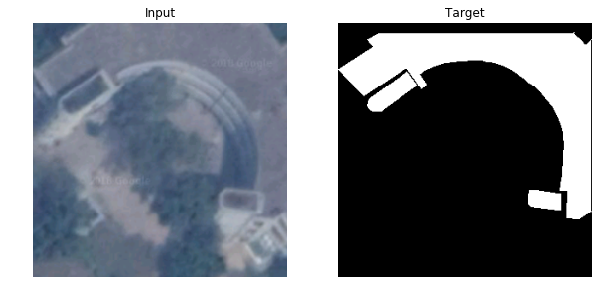

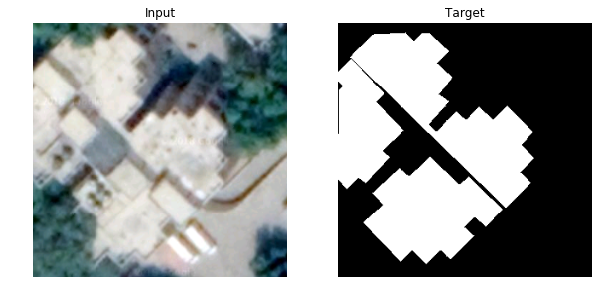

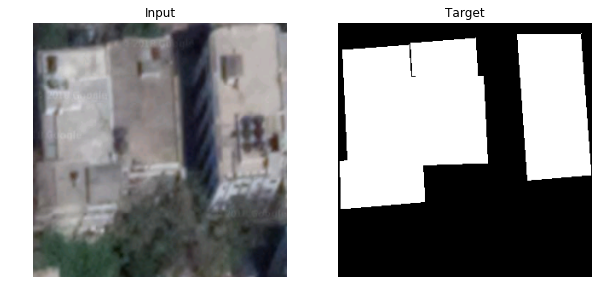

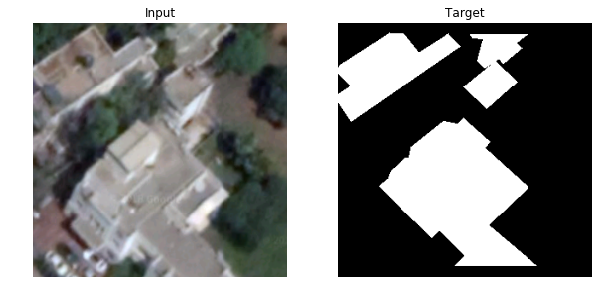

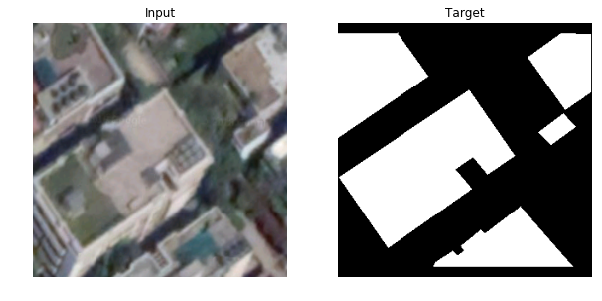

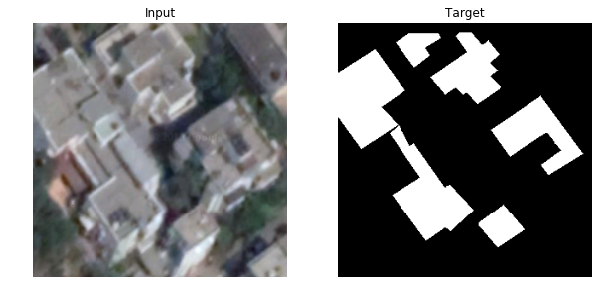

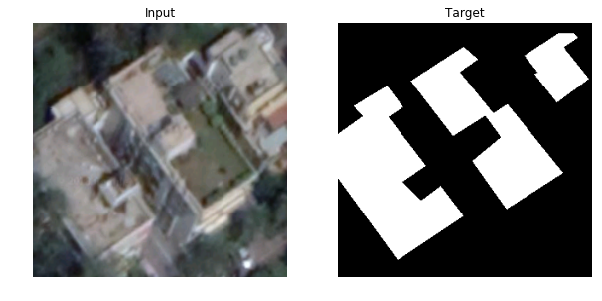

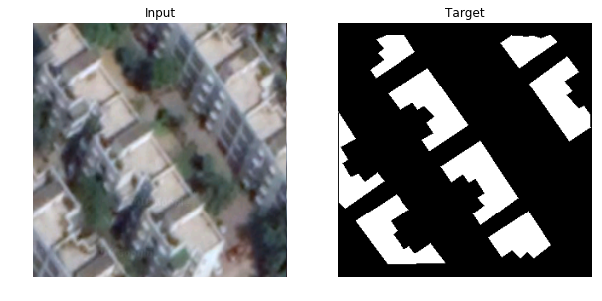

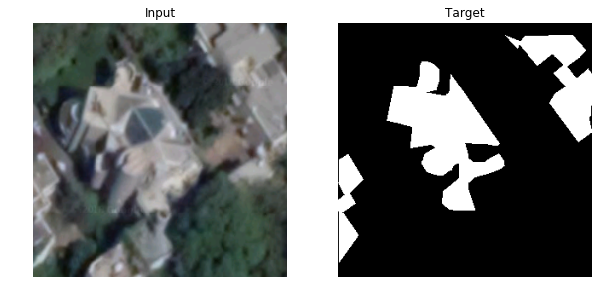

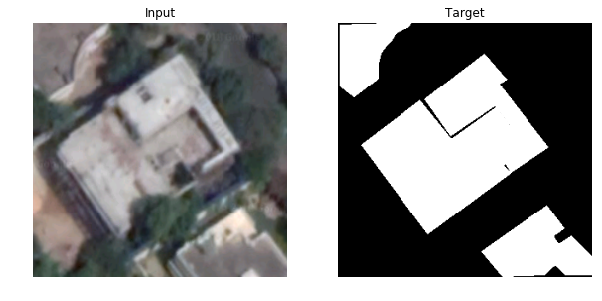

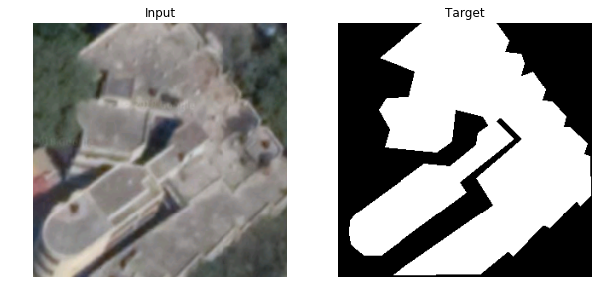

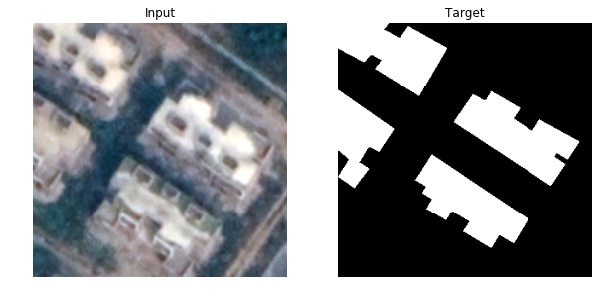

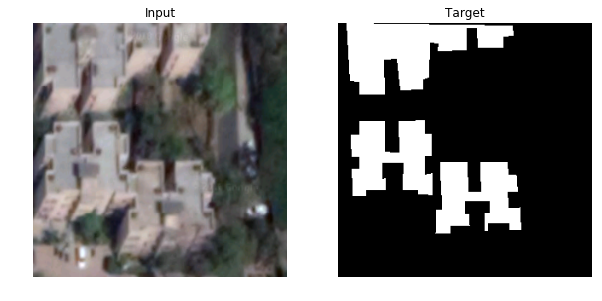

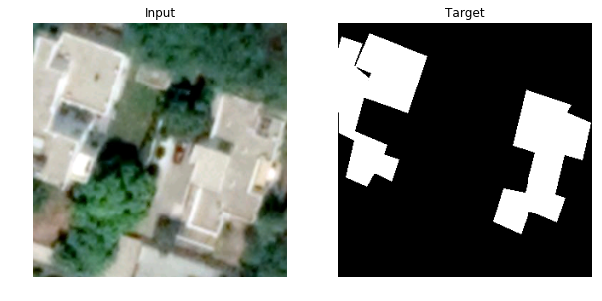

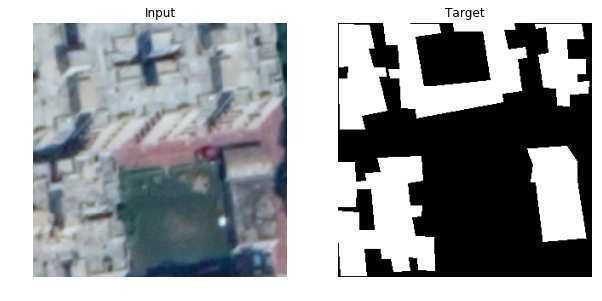

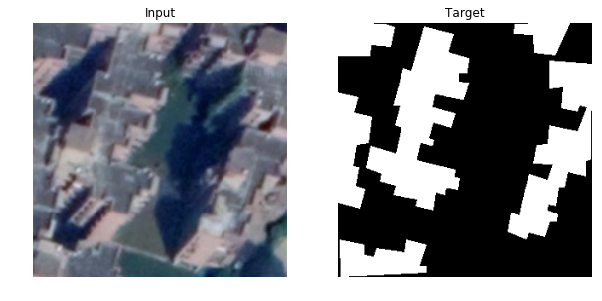

In [7]:
imgs, masks = next(get_data_batch(train_paths, batchsize=16))
print("Batch:", imgs.shape, masks.shape)
for i, (img, mask) in enumerate(zip(imgs, masks)):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('Input')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('Target')
    plt.imshow(mask.reshape(MODEL_INPUT_SHAPE), cmap='gray')
    plt.show()

### Data Augmentation

In [8]:
from tensorflow.keras.preprocessing import image as Kimage

# we create two instances with the same arguments
data_gen_args = dict(rotation_range=45.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2,
                    )
image_datagen = Kimage.ImageDataGenerator(**data_gen_args)
mask_datagen = Kimage.ImageDataGenerator(**data_gen_args)
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

# INITIATE DATA GENERATORS
traingen = get_data_batch(train_paths, BATCHSIZE)
valgen = get_data_batch(val_paths, BATCHSIZE)

def trainAugm():
    for i, (trainimgs, trainmasks) in enumerate(traingen):
#         print('data batch:',i)
        for j in range(4):
#             print('flow batch:', j)
            image_datagen.fit(trainimgs, augment=True, seed=seed)
            mask_datagen.fit(trainmasks, augment=True, seed=seed)
            image_generator = image_datagen.flow(trainimgs, 
                                                 batch_size=BATCHSIZE,
#                                                  save_to_dir='kerasGeneratedImages',
#                                                  save_prefix='KGI',
                                                 seed=seed)
            mask_generator = mask_datagen.flow(trainmasks,
                                               batch_size=BATCHSIZE,
#                                                save_to_dir='kerasGeneratedMasks',
#                                                save_prefix='KGM',
                                               seed=seed)
            
            yield next(zip(image_generator, mask_generator))

## Model

In [9]:
from u_net import get_unet_256
from custom_losses_and_metrics import bce_dice_loss, dice_coeff
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
                  
## intersection over union
def IoU(y_true, y_pred, eps=1e-6):
    if np.max(y_true) == 0.0:
        return IoU(1-y_true, 1-y_pred) ## empty image; calc IoU of zeros
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) - intersection
    return -K.mean( (intersection + eps) / (union + eps), axis=0)

model = get_unet_256()
# model.compile(optimizer=RMSprop(lr=0.0001), loss=bce_dice_loss, metrics=[dice_coeff])
model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=IoU, metrics=['binary_accuracy'])

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
model_name = 'SAVERA_498'
save_dir = '{}_chkpt'.format(model_name)
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
weight_path="{}/{}_weights.best.hdf5".format(save_dir, model_name)
checkpoint = ModelCheckpoint(weight_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min',
                             save_weights_only=True
                            )
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', 
                                   factor=0.2,
                                   patience=1, 
                                   verbose=1, 
                                   mode='min',
                                   min_delta=0.0001, 
                                   cooldown=0, 
                                   min_lr=1e-8
                                  )
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      verbose=2,
                      patience=20 # probably needs to be more patient
                     )

callbacks_list = [checkpoint, early, reduceLROnPlat]

In [11]:
# LOAD CHECKPOINT (IF ANY)
try:
    model.load_weights(weight_path)
    print("CheckPoint loaded!")
except:
    print("No CheckPoint found.")
    pass

CheckPoint loaded!


In [12]:
# START TRAINING
history = model.fit_generator(
    generator=trainAugm(),
    steps_per_epoch=len(train_paths),
    validation_data=valgen,
    validation_steps=len(val_paths)//BATCHSIZE,
    epochs=40,
    callbacks=callbacks_list
)

Epoch 1/40
444/445 [============================>.] - ETA: 0s - loss: -0.8115 - binary_accuracy: 0.7948
Epoch 00001: val_loss improved from inf to -0.72338, saving model to SAVERA_498_chkpt/SAVERA_498_weights.best.hdf5
445/445 [==============================] - 151s 340ms/step - loss: -0.8109 - binary_accuracy: 0.7945 - val_loss: -0.7234 - val_binary_accuracy: 0.7841
Epoch 2/40
444/445 [============================>.] - ETA: 0s - loss: -0.8021 - binary_accuracy: 0.7862
Epoch 00002: val_loss did not improve from -0.72338

Epoch 00002: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
445/445 [==============================] - 134s 302ms/step - loss: -0.8015 - binary_accuracy: 0.7860 - val_loss: -0.7116 - val_binary_accuracy: 0.7744
Epoch 3/40
444/445 [============================>.] - ETA: 0s - loss: -0.8046 - binary_accuracy: 0.7875
Epoch 00003: val_loss improved from -0.72338 to -0.73821, saving model to SAVERA_498_chkpt/SAVERA_498_weights.best.hdf5
445/445 [========

KeyboardInterrupt: 

In [13]:
# SAVE MODEL
model.save('{}/{}_trained_full_model.h5'.format(save_dir, model_name))

In [14]:
# from tensorflow.keras.models import load_model
# # # LOAD MODEL
# # # model = load_model('{}/{}_trained_full_model.h5'.format(save_dir, model_name), custom_objects={
# # #     'bce_dice_loss':bce_dice_loss,
# # #     'dice_coeff':dice_coeff
# # # })
# model = load_model('{}/{}_trained_full_model.h5'.format(save_dir, model_name), custom_objects={
#     'IoU':IoU,
# })
# # model = load_model('{}/{}_trained_full_model.h5'.format(save_dir, model_name))

### Traning quality

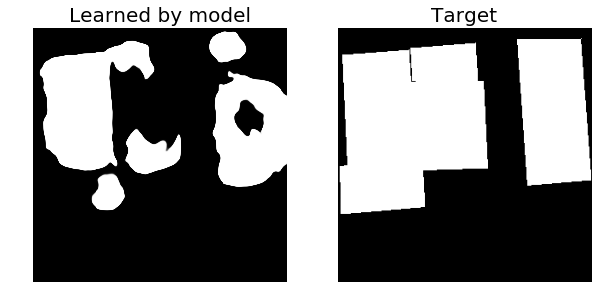

In [15]:
img_no = 2
imgs, masks, next(get_data_batch(train_paths))
testimg = imgs[img_no].reshape(1, 256, 256, 3)
targetmask = masks[img_no].reshape(MODEL_INPUT_SHAPE)
pred = model.predict(testimg)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Learned by model', fontsize=20)
plt.imshow(pred.reshape(MODEL_INPUT_SHAPE), cmap='gray')
plt.subplot(1,2,2)
plt.axis('off')
plt.title('Target', fontsize=20)
plt.imshow(targetmask, cmap='gray')
plt.show()

### Validation

Batch: (8, 256, 256, 3) (8, 256, 256, 1)


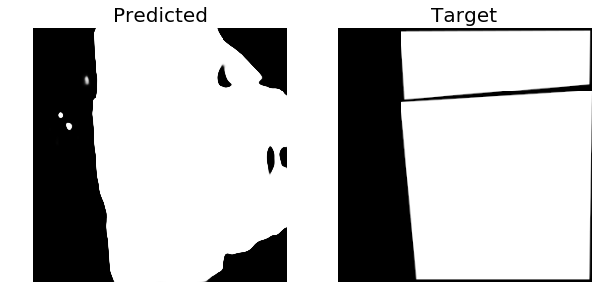

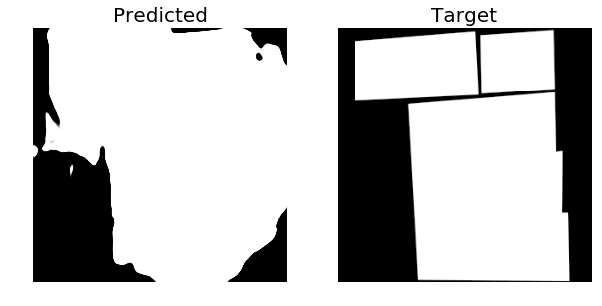

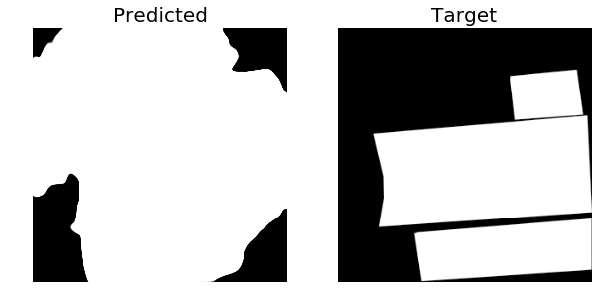

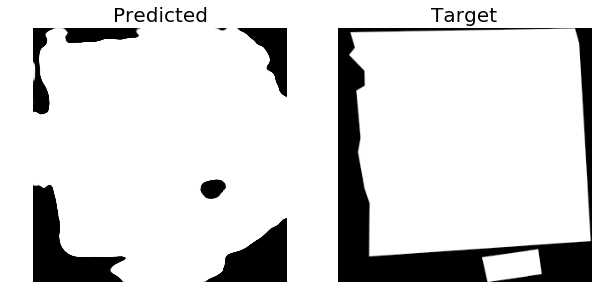

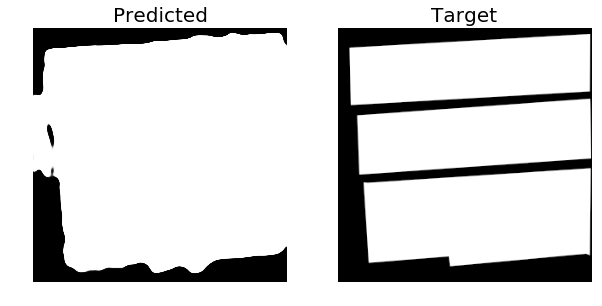

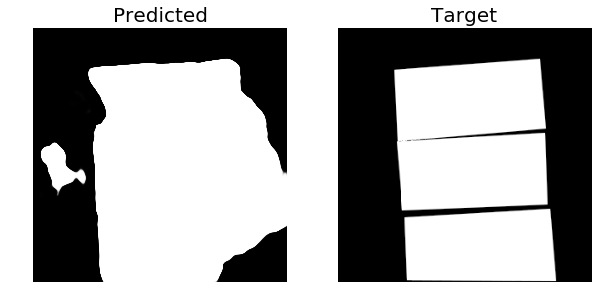

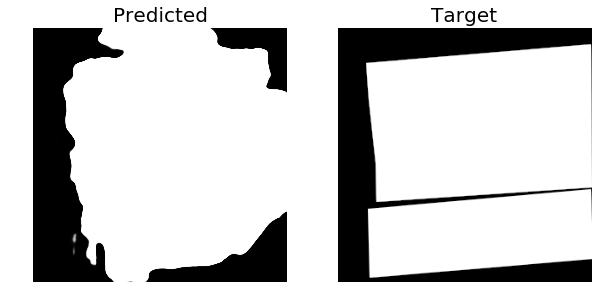

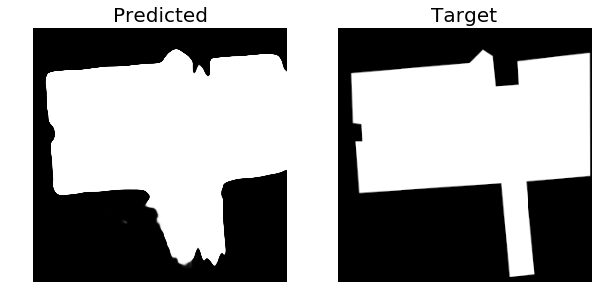

In [16]:
imgs, masks = next(get_data_batch(val_paths))
print("Batch:", imgs.shape, masks.shape)
for img, mask in zip(imgs, masks):
    testimg = img.reshape(1, 256, 256, 3)
    targetmask = mask.reshape(MODEL_INPUT_SHAPE)
    pred = model.predict(testimg)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('Predicted', fontsize=20)
    plt.imshow(pred.reshape(MODEL_INPUT_SHAPE), cmap='gray')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('Target', fontsize=20)
    plt.imshow(targetmask, cmap='gray')
    plt.show()

### TEST

Batch: (10, 256, 256, 3) (10, 256, 256, 1)


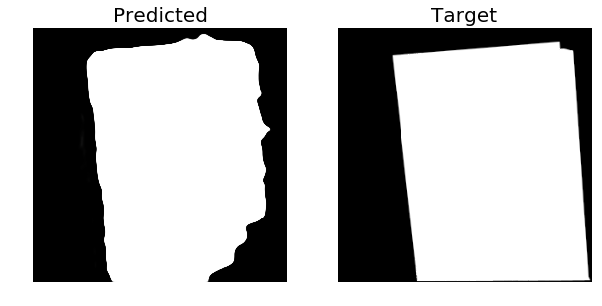

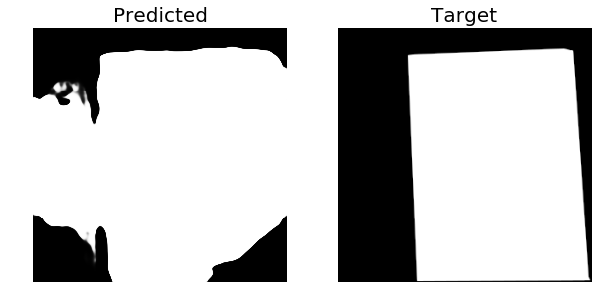

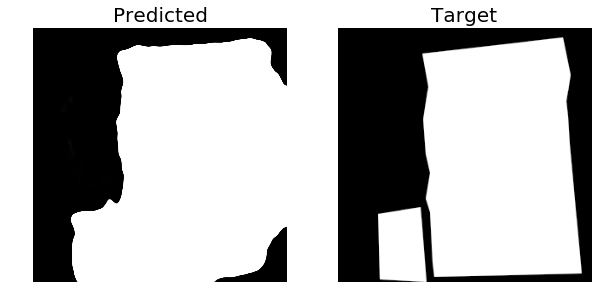

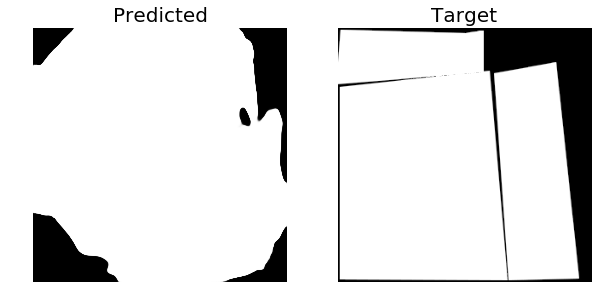

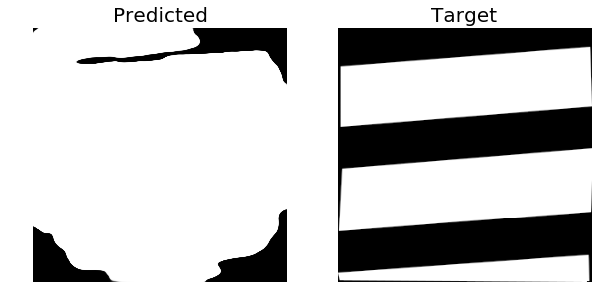

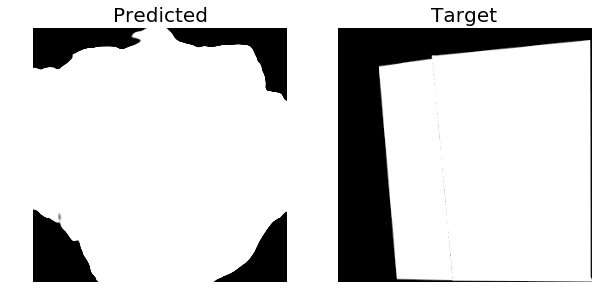

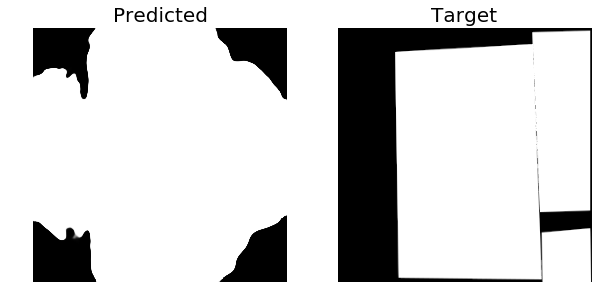

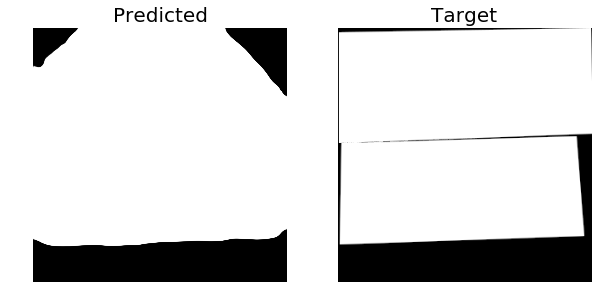

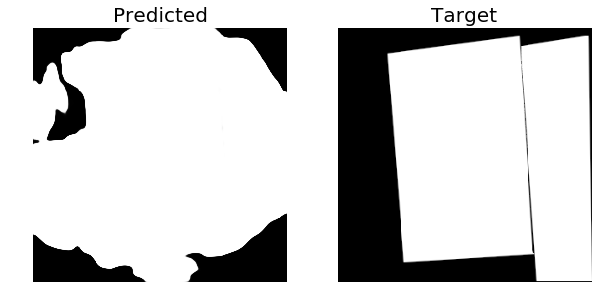

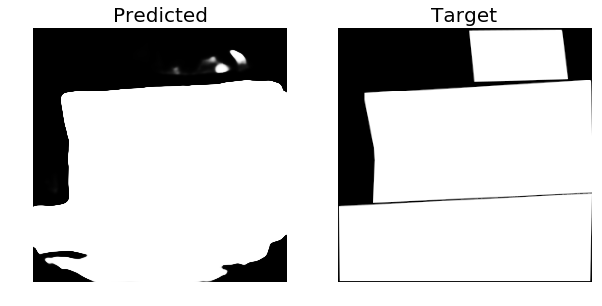

In [17]:
imgs, masks = next(get_data_batch(test_paths, batchsize=len(test_paths)))
print("Batch:", imgs.shape, masks.shape)
for img, mask in zip(imgs, masks):
    testimg = img.reshape(1, 256, 256, 3)
    targetmask = mask.reshape(MODEL_INPUT_SHAPE)
    pred = model.predict(testimg)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('Predicted', fontsize=20)
    plt.imshow(pred.reshape(MODEL_INPUT_SHAPE), cmap='gray')
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('Target', fontsize=20)
    plt.imshow(targetmask, cmap='gray')
    plt.show()